# Credit Card Fraud Detecion|Logistic Regression

### Importing libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import seaborn as sns

### Loading Datasets

In [7]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\creditcard.csv\creditcard.csv")

### Viewing Datasets

In [9]:
#looking the top data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
#shape of data
df.shape

(284807, 31)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
df[['Amount', 'Class','Time']].describe()

,Amount,Class,Time
count,284807.000000,284807.000000,284807.000000
mean,88.349619,0.001727,94813.859575
std,250.120109,0.041527,47488.145955
min,0.000000,0.000000,0.000000
25%,5.600000,0.000000,54201.500000
50%,22.000000,0.000000,84692.000000
75%,77.165000,0.000000,139320.500000
max,25691.160000,1.000000,172792.000000


In [19]:
#df.isna().sum()

### Finding the percentage for fraud and not fraud transaction 

> **Percentage of total fraud transaction** 

In [25]:
nfcount = 0
notfraud=df['Class']
for i in range(len(notfraud)):
    if notfraud[i]==0:
        nfcount = nfcount +1
nfcount
per_nf=(nfcount/len(notfraud))*100
print("percentage of total not fraud transaction in the dataset: " ,per_nf)

percentage of total not fraud transaction in the dataset:  99.82725143693798


> **Percentage of total fraud transaction**

In [32]:
fcount=1
fraud =df['Class']
for i in range(len(fraud)):
    if fraud[i]== 1:
        fcount = fcount +1
fcount
per_f = (fcount/len(fraud))*100
print("percentage of total fraud transaction in the dataset :",per_f)


percentage of total fraud transaction in the dataset : 0.17309967802757656


> **Plotting Fraud and Not Fraud**

In [40]:
plot_data = pd.DataFrame()
plot_data['Fraud Transaction'] = fraud
plot_data['NotFraud Transaction'] =notfraud
plot_data

,Fraud Transaction,NotFraud Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


<AxesSubplot:title={'center':'Bar plot for Fraud Vs not fraud'}, xlabel='Fraud Transaction', ylabel='NotFraud Transaction'>

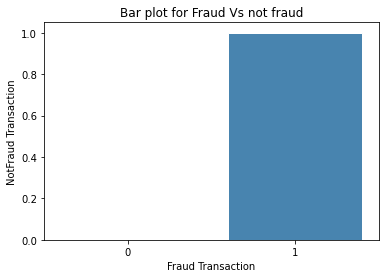

In [44]:
plt.title("Bar plot for Fraud Vs not fraud")
sns.barplot(x='Fraud Transaction', y='NotFraud Transaction' , data = plot_data, palette ='Blues',edgecolor ='w')

> * Ratio for not fruad transaction is pretty high as compared too fraud transaction*

> **Finding the relationship between Time and Amount**

Text(0.5, 1.0, 'Time vs amount')

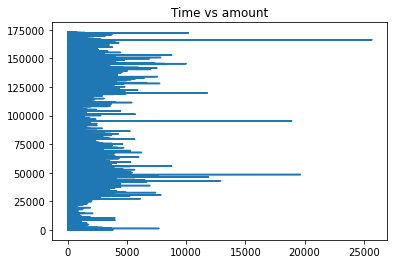

In [52]:
x=df['Amount']
y=df['Time']
plt.plot(x,y)
plt.title("Time vs amount")

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Amont Distribution'}, xlabel='Amount', ylabel='Density'>

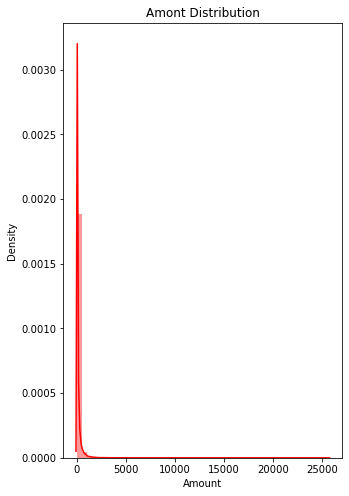

In [54]:
plt.figure(figsize=(5,8), )
plt.title("Amont Distribution")
sns.distplot(df['Amount'], color= "red")

> ** Distribution curve:It is shown that the number high amount transactions are very low. So there is a high probability for huge transactions to be fraudulent **

#### Looking for outlier

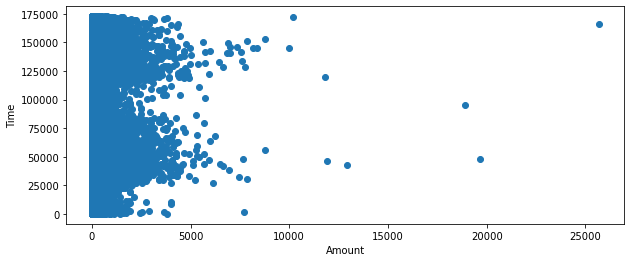

In [59]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(df['Amount'], df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

#### Correlation matrix

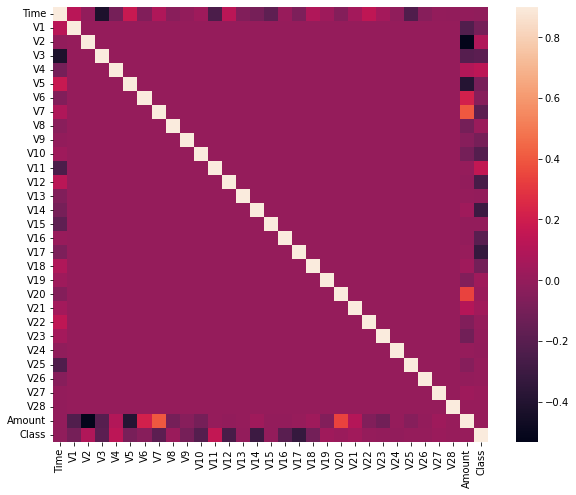

In [62]:
correlation_matirx = df.corr()
fig = plt.figure(figsize =(10,8))
sns.heatmap(correlation_matirx ,vmax=.9, square = True)
plt.show()


### Building the model

> **Creating X and Y variables**

In [68]:
x= df.drop(['Class'], axis= 1)
y= df['Class']
xtrain,xtest,ytrain,ytest= train_test_split(x,y , test_size=0.2,random_state =42)

In [74]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(xtrain,ytrain)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
ypredict = logReg.predict(xtest)
accuracy = logReg.score(xtest,ytest)

**Confusion Matrix**
- Positive (P) : Observation is positive (for example: The transaction genuine).
- Negative (N) : Observation is not positive (for example:The transaction is not genuine).
- True Positive (TP) : Observation is positive, and is predicted to be positive.
- False Negative (FN) : Observation is positive, but is predicted negative.
- True Negative (TN) : Observation is negative, and is predicted to be negative.
- False Positive (FP) : Observation is negative, but is predicted positive.

In [82]:
cm = metrics.confusion_matrix(ytest,ypredict)
print(cm)

[[56829    35]
 [   43    55]]


**Accuracy calculation**

In [86]:
print("Accuracy score of the logistic Regression model :" , accuracy*100, '%')

Accuracy score of the logistic Regression model : 99.86306660580738 %
